# **Voting**

In [2]:
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df_comb = pd.read_csv("Dataset/dis_sym_dataset_comb.csv")
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [5]:
accuracy_list = []
cross_accuracy_list = []
model_list = []


### Testing

In [6]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)

In [10]:
voting = VotingClassifier([('KNN', knn),
                           ('LR', lr),
                           ('SVM', svm),
                          ('DT',dt),
                          ('MLP',mlp)])


In [11]:
voting.fit(X, Y)
hard_predictions = voting.predict(x_test)

In [12]:
acc_hard_voting= round(Decimal(accuracy_score(y_test, hard_predictions) * 100), 2)
accuracy_list.append(acc_hard_voting)
model_list.append("HV")
print(f"Accuracy (HV) : {acc_hard_voting}%")
scores_hv = cross_val_score(voting, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_hv.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (HV): {score}%")

Accuracy (HV) : 91.63%
Cross Validation Accuracy (HV): 89.20%


## 1. Hard Voting

According to the average accuracy(normal+cross validation) the increasing order of models is as follows:
MNB, DT, MLP, RF, KNN, SVM, LR
We can consider 4 strong models to form an ensemble with remaining 3 weak models each.
Note: Random Forests model is an ensemble of Decision Tree. However, it can be included in the combination to increase accuracy. 
Ensemble 1: LR + SVM + KNN + MNB
Ensemble 2: LR + SVM + KNN + MLP
Ensemble 3: LR + SVM + KNN + RF
Ensemble 4: LR + SVM + KNN + DT

### 1.1 Ensemble1: LR + SVM + KNN + MNB

In [5]:
knn1 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr1 = LogisticRegression()
svm1 = SVC()
mnb1 = MultinomialNB()

In [7]:
voting1_new = VotingClassifier([('LR', lr1),
                           ('SVM', svm1),
                          ('KNN',knn1),
                          ('MNB',mnb1)])


In [8]:
voting1_new.fit(X, Y)
hard_predictions1_new = voting1_new.predict(x_test)

In [9]:
acc_hard_mnb_new= round(Decimal(accuracy_score(y_test, hard_predictions1_new) * 100), 2)
accuracy_list.append(acc_hard_mnb_new)
model_list.append("HV_mnb")
print(f"Accuracy (HV_mnb) : {acc_hard_mnb_new}%")
scores_hv_mnb_new = cross_val_score(voting1_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score1_new = round(Decimal(scores_hv_mnb_new.mean() * 100), 2)
cross_accuracy_list.append(score1_new)
print(f"Cross Validation Accuracy (HV_mnb): {score1_new}%")

Accuracy (HV_mnb) : 91.86%
Cross Validation Accuracy (HV_mnb): 88.73%


### 1.2 Ensemble2: LR + SVM + KNN + MLP 

In [6]:
knn2 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr2 = LogisticRegression()
svm2 = SVC()
mlp2 = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)

In [7]:
voting2_new = VotingClassifier([('LR', lr2),
                           ('SVM', svm2),
                          ('KNN',knn2),
                          ('MLP',mlp2)])

In [8]:
voting2_new.fit(X, Y)
hard_predictions2_new = voting2_new.predict(x_test)

In [9]:
acc_hard_mlp_new= round(Decimal(accuracy_score(y_test, hard_predictions2_new) * 100), 2)
print(confusion_matrix(y_test,hard_predictions2_new))
accuracy_list.append(acc_hard_mlp_new)
model_list.append("HV_mlp")
print(f"Accuracy (HV_mlp) : {acc_hard_mlp_new}%")
scores_hv_mlp_new = cross_val_score(voting2_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score2_new = round(Decimal(scores_hv_mlp_new.mean() * 100), 2)
cross_accuracy_list.append(score2_new)
print(f"Cross Validation Accuracy (HV_mnb): {score2_new}%")

[[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
Accuracy (HV_mlp) : 90.95%
Cross Validation Accuracy (HV_mnb): 88.67%


In [2]:
print(confusion_matrix(y_test,hard_predictions2_new))

NameError: name 'y_test' is not defined

### 1.3 Ensemble3: LR + SVM + KNN + RF

In [16]:
knn3 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr3 = LogisticRegression()
svm3 = SVC()
rf3 = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [17]:
voting3_new = VotingClassifier([('LR', lr3),
                           ('SVM', svm3),
                          ('KNN',knn3),
                          ('RF',rf3)])

In [18]:
voting3_new.fit(X, Y)
hard_predictions3_new = voting3_new.predict(x_test)

In [20]:
acc_hard_rf_new= round(Decimal(accuracy_score(y_test, hard_predictions3_new) * 100), 2)
accuracy_list.append(acc_hard_rf_new)
model_list.append("HV_RF")
print(f"Accuracy (HV_RF) : {acc_hard_rf_new}%")
scores_hv_rf_new = cross_val_score(voting3_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score3_new = round(Decimal(scores_hv_rf_new.mean() * 100), 2)
cross_accuracy_list.append(score3_new)
print(f"Cross Validation Accuracy (HV_RF): {score3_new}%")

Accuracy (HV_RF) : 92.19%
Cross Validation Accuracy (HV_RF): 88.58%


### 1.4 Ensemble4: LR + SVM + KNN + DT

In [21]:
knn4 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr4 = LogisticRegression()
svm4 = SVC()
dt4 = DecisionTreeClassifier()

In [22]:
voting4_new = VotingClassifier([('LR', lr4),
                           ('SVM', svm4),
                          ('KNN',knn4),
                          ('DT',dt4)])

In [23]:
voting4_new.fit(X, Y)
hard_predictions4_new = voting4_new.predict(x_test)

In [24]:
acc_hard_dt4_new= round(Decimal(accuracy_score(y_test, hard_predictions4_new) * 100), 2)
accuracy_list.append(acc_hard_dt4_new)
model_list.append("HV_DT")
print(f"Accuracy (HV_DT) : {acc_hard_dt4_new}%")
scores_hv_dt4_new = cross_val_score(voting4_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score4_new = round(Decimal(scores_hv_dt4_new.mean() * 100), 2)
cross_accuracy_list.append(score4_new)
print(f"Cross Validation Accuracy (HV_DT): {score4_new}%")

Accuracy (HV_DT) : 91.97%
Cross Validation Accuracy (HV_DT): 88.29%


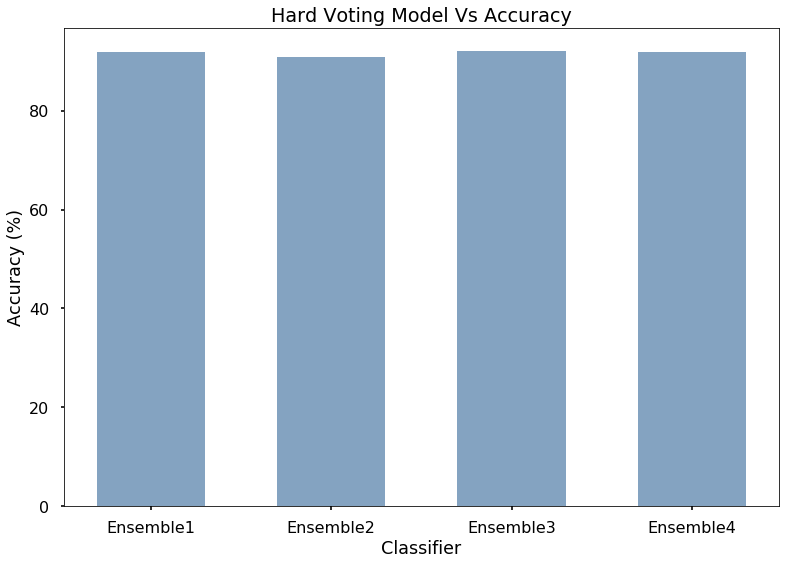

In [10]:
hard_voting_accuracy = [91.86, 90.95, 92.19, 91.97]
hard_voting_models = ['Ensemble1', 'Ensemble2', 'Ensemble3', 'Ensemble4']
plt.style.use('seaborn-poster')
plt.title("Hard Voting Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(hard_voting_models, hard_voting_accuracy, color=(0.2, 0.4, 0.6, 0.6), width = 0.60)
plt.show()

In [11]:
dict = {'Hard Voting Model' : ['LR+SVM+KNN+MNB', 'LR+SVM+KNN+MLP', 'LR+SVM+KNN+RF', 'LR+SVM+KNN+DT'],
        'Accuracy(%)' : [91.86, 90.95, 92.19, 91.97]}
df = pd.DataFrame(dict)
df

,Hard Voting Model,Accuracy(%)
0,LR+SVM+KNN+MNB,91.86
1,LR+SVM+KNN+MLP,90.95
2,LR+SVM+KNN+RF,92.19
3,LR+SVM+KNN+DT,91.97


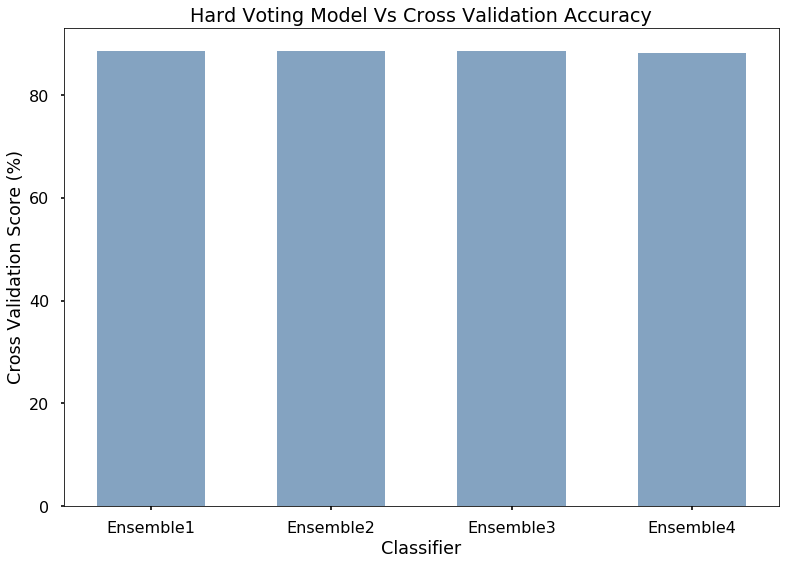

In [13]:
hard_voting_accuracy = [88.73, 88.67, 88.58, 88.29]
hard_voting_models = ['Ensemble1', 'Ensemble2', 'Ensemble3', 'Ensemble4']
plt.style.use('seaborn-poster')
plt.title("Hard Voting Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Cross Validation Score (%)')
plt.bar(hard_voting_models, hard_voting_accuracy, color=(0.2, 0.4, 0.6, 0.6), width = 0.60)
plt.show()

In [14]:
dict = {'Hard Voting Model' : ['LR+SVM+KNN+MNB', 'LR+SVM+KNN+MLP', 'LR+SVM+KNN+RF', 'LR+SVM+KNN+DT'],
        'Cross Validtion Accuracy(%)' : [88.73, 88.67, 88.58, 88.29]}
df = pd.DataFrame(dict)
df

,Hard Voting Model,Cross Validtion Accuracy(%)
0,LR+SVM+KNN+MNB,88.73
1,LR+SVM+KNN+MLP,88.67
2,LR+SVM+KNN+RF,88.58
3,LR+SVM+KNN+DT,88.29


## 2. Soft Voting

### 2.1 Ensemble1: LR + SVM + KNN + MNB

In [25]:
knn5 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr5 = LogisticRegression()
svm5 = SVC(probability = True)
mnb5 = MultinomialNB()

In [26]:
sof_voting1_new = VotingClassifier([('LR', lr5),
                           ('SVM', svm5),
                          ('KNN',knn5),
                          ('MNB',mnb5)], voting = 'soft')

In [27]:
sof_voting1_new.fit(X, Y)
soft_predictions1_new = sof_voting1_new.predict(x_test)
acc_soft_mnb_new = round(Decimal(accuracy_score(y_test,soft_predictions1_new) * 100), 2)
accuracy_list.append(acc_soft_mnb_new)
model_list.append("SV_mnb")
print(f"Accuracy (SV_mnb) : {acc_soft_mnb_new}%")
scores_sv_mnb_new = cross_val_score(sof_voting1_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score_sv1_new = round(Decimal(scores_sv_mnb_new.mean() * 100), 2)
cross_accuracy_list.append(score_sv1_new)
print(f"Cross Validation Accuracy (SV_mnb): {score_sv1_new}%")

Accuracy (SV_mnb) : 92.53%
Cross Validation Accuracy (SV_mnb): 87.82%


### 2.2 Ensemble2: LR + SVM + KNN + MLP

In [28]:
knn6 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr6 = LogisticRegression()
svm6 = SVC(probability=True)
mlp6 = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)

In [29]:
sof_voting2_new = VotingClassifier([('LR', lr6),
                           ('SVM', svm6),
                          ('KNN',knn6),
                          ('MLP',mlp6)], voting = 'soft')

In [32]:
sof_voting2_new.fit(X, Y)
soft_predictions2_new = sof_voting2_new.predict(x_test)
acc_soft_mlp_new= round(Decimal(accuracy_score(y_test,soft_predictions2_new) * 100), 2)
accuracy_list.append(acc_soft_mlp_new)
model_list.append("SV_mlp")
print(f"Accuracy (SV_mlp) : {acc_soft_mlp_new}%")
scores_sv_mlp_new = cross_val_score(sof_voting2_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score_sv2_new = round(Decimal(scores_sv_mlp_new.mean() * 100), 2)
cross_accuracy_list.append(score_sv2_new)
print(f"Cross Validation Accuracy (SV_mlp): {score_sv2_new}%")

Accuracy (SV_mlp) : 92.99%
Cross Validation Accuracy (SV_mlp): 87.81%


### 2.3 Ensemble3: LR + SVM + KNN + RF

In [34]:
knn7 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr7 = LogisticRegression()
svm7 = SVC(probability =True)
rf7 = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [35]:
sof_voting3_new = VotingClassifier([('LR', lr7),
                           ('SVM', svm7),
                          ('KNN',knn7),
                          ('RF',rf7)], voting = 'soft')

In [37]:
sof_voting3_new.fit(X, Y)
soft_predictions3_new = sof_voting3_new.predict(x_test)
acc_soft_rf_new = round(Decimal(accuracy_score(y_test,soft_predictions3_new) * 100), 2)
accuracy_list.append(acc_soft_rf_new)
model_list.append("SV_RF")
print(f"Accuracy (SV_RF) : {acc_soft_rf_new}%")
scores_sv_rf_new = cross_val_score(sof_voting3_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score_sv3_new = round(Decimal(scores_sv_rf_new.mean() * 100), 2)
cross_accuracy_list.append(score_sv3_new)
print(f"Cross Validation Accuracy (SV_RF): {score_sv3_new}%")

Accuracy (SV_RF) : 92.42%
Cross Validation Accuracy (SV_RF): 88.10%


### 2.4 Ensemble4: LR + SVM + KNN + DT

In [38]:
knn8 = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
lr8 = LogisticRegression()
svm8 = SVC(probability = True)
dt8 = DecisionTreeClassifier()

In [39]:
sof_voting4_new = VotingClassifier([('LR', lr8),
                           ('SVM', svm8),
                          ('KNN',knn8),
                          ('DT',dt8)], voting = 'soft')

In [41]:
sof_voting4_new.fit(X, Y)
soft_predictions4_new = sof_voting4_new.predict(x_test)
acc_soft_dt_new = round(Decimal(accuracy_score(y_test,soft_predictions4_new) * 100), 2)
accuracy_list.append(acc_soft_dt_new)
model_list.append("SV_DT")
print(f"Accuracy (SV_DT) : {acc_soft_dt_new}%")
scores_sv_dt_new = cross_val_score(sof_voting4_new, X, Y, cv=5)
# mean of cross val score (accuracy)
score_sv4_new = round(Decimal(scores_sv_dt_new.mean() * 100), 2)
cross_accuracy_list.append(score_sv4_new)
print(f"Cross Validation Accuracy (SV_DT): {score_sv4_new}%")

Accuracy (SV_DT) : 92.31%
Cross Validation Accuracy (SV_DT): 86.26%


NameError: name 'fig' is not defined

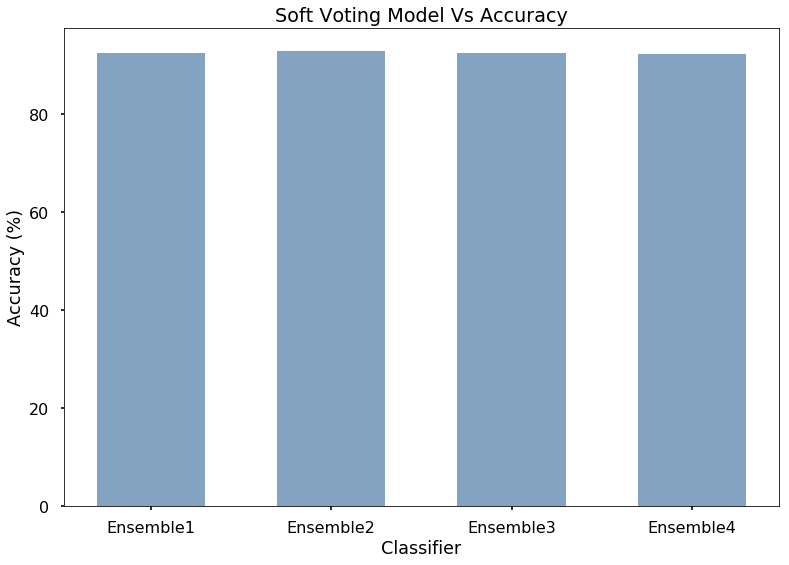

In [5]:
soft_voting_accuracy = [92.53,92.99,92.42,92.31]
soft_voting_models = ['Ensemble1', 'Ensemble2', 'Ensemble3', 'Ensemble4']
plt.style.use('seaborn-poster')
plt.title("Soft Voting Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(soft_voting_models, soft_voting_accuracy, color=(0.2, 0.4, 0.6, 0.6), width = 0.60)
for i, j in enumerate(soft_voting_accuracy):
    fig.text(float(i)-0.15, float(j)+0.7, str(j), color='green')
plt.show()


In [4]:
dict = {'Soft Voting Model' : ['LR+SVM+KNN+MNB', 'LR+SVM+KNN+MLP', 'LR+SVM+KNN+RF', 'LR+SVM+KNN+DT'],
        'Accuracy(%)' : [92.53,92.99,92.42,92.31]}
df = pd.DataFrame(dict)
df

,Soft Voting Model,Accuracy(%)
0,LR+SVM+KNN+MNB,92.53
1,LR+SVM+KNN+MLP,92.99
2,LR+SVM+KNN+RF,92.42
3,LR+SVM+KNN+DT,92.31


NameError: name 'fig' is not defined

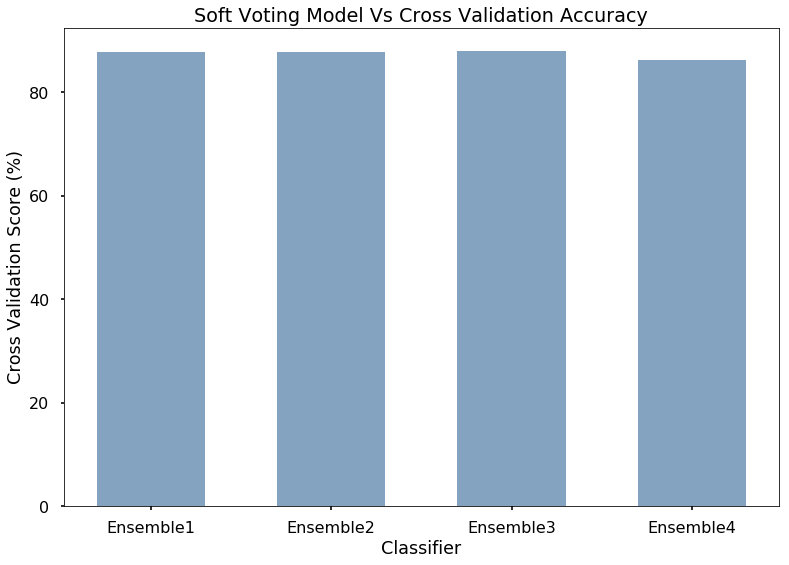

In [6]:
soft_voting_accuracy = [87.82, 87.81, 88.10, 86.26]
soft_voting_models = ['Ensemble1', 'Ensemble2', 'Ensemble3', 'Ensemble4']
plt.style.use('seaborn-poster')
plt.title("Soft Voting Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Cross Validation Score (%)')
plt.bar(soft_voting_models, soft_voting_accuracy, color=(0.2, 0.4, 0.6, 0.6), width = 0.60)
for i, j in enumerate(soft_voting_accuracy):
    fig.text(float(i)-0.15, float(j)+0.7, str(j), color='green')
plt.show()

In [7]:
dict = {'Soft Voting Model' : ['LR+SVM+KNN+MNB', 'LR+SVM+KNN+MLP', 'LR+SVM+KNN+RF', 'LR+SVM+KNN+DT'],
        'Cross Validation Accuracy(%)' : [87.82, 87.81, 88.10, 86.26]}
df = pd.DataFrame(dict)
df

,Soft Voting Model,Cross Validation Accuracy(%)
0,LR+SVM+KNN+MNB,87.82
1,LR+SVM+KNN+MLP,87.81
2,LR+SVM+KNN+RF,88.10
3,LR+SVM+KNN+DT,86.26


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

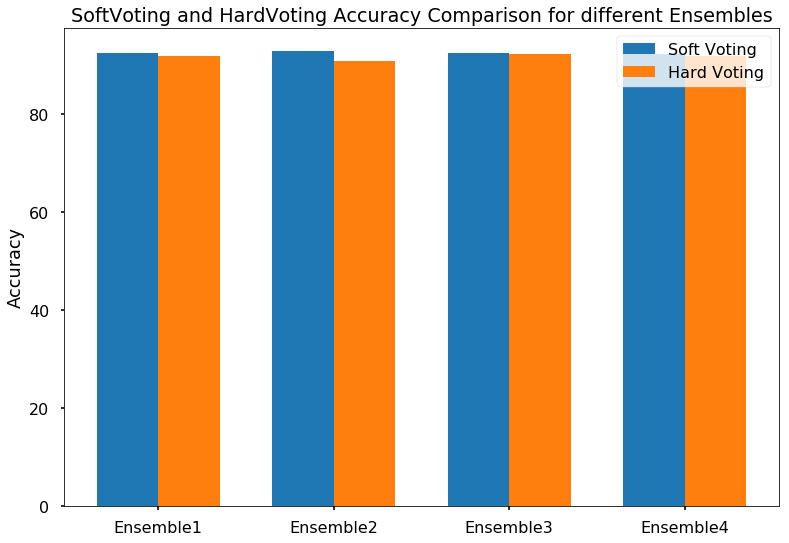

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Ensemble1', 'Ensemble2', 'Ensemble3', 'Ensemble4']
soft_voting = [92.53, 92.99, 92.42,92.31]
hard_voting = [91.86, 90.95, 92.19, 91.97]

x = np.arange(len(labels))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, soft_voting, width, label='Soft Voting')
rects2 = ax.bar(x + width/2, hard_voting, width, label='Hard Voting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('SoftVoting and HardVoting Accuracy Comparison for different Ensembles')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()